In [1]:
import pandas as pd
import networkx as nx
import itertools
import collections
import matplotlib.pyplot as plt
import random

In [2]:
G = nx.read_gml('./networks/producers_network.gml')
print(nx.info(G))

Graph with 1221 nodes and 13430 edges


C:\Users\28228\AppData\Local\Temp\ipykernel_63160\3017861093.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


## Basic properties

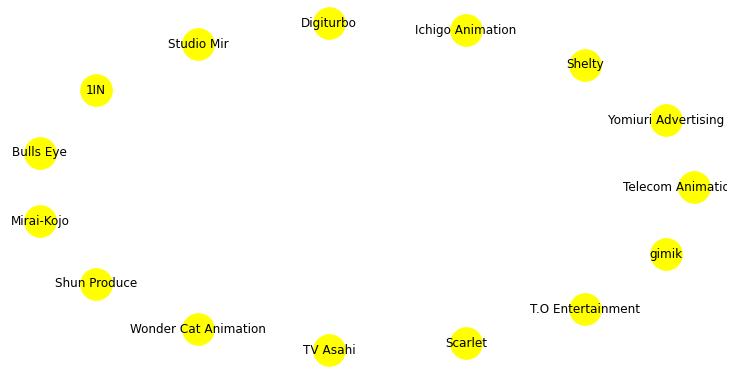

In [3]:
sample_nodes = random.sample(list(G.nodes), 15)
S = G.subgraph(sample_nodes)
pos = nx.circular_layout(S)
plt.figure(figsize=(10,5)) 
nx.draw(S, pos, with_labels = True, node_color="yellow", node_size=1000)
plt.show()

### treated as unweighted properties

density: 0.018031444260952458
--------------------------------------------------
top5 inflential nodes using degree centrality:
AT-X 0.25901639344262295
Pony Canyon 0.23524590163934425
Movic 0.2278688524590164
Tokyo MX 0.22295081967213115
TV Tokyo 0.21967213114754097
Lantis 0.2180327868852459


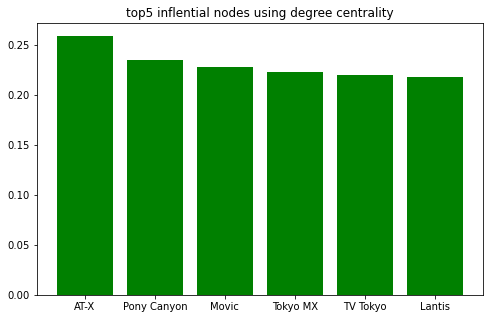

In [21]:
# density
print("density:", nx.density(G))
node_name = []
value = []
#Sort for identifying top10 inflential nodes using degree centrality
print("--------------------------------------------------")
degree_centrality = nx.degree_centrality(G)
rank = 0
print("top5 inflential nodes using degree centrality:")
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    print(node, degree_centrality[node])
    node_name.append(node)
    value.append(degree_centrality[node])
    rank+=1
    if rank > 5:
        break
plt.figure(figsize=(8,5))
plt.title("top5 inflential nodes using degree centrality")
plt.bar(node_name, value, color="green")
plt.show()




--------------------------------------------------
top5 inflential nodes using closeness centrality:
AT-X 0.508395383752142
Pony Canyon 0.5060547051897473
Dentsu 0.49825513131102955
Lantis 0.4980293700372139
TV Tokyo 0.49555943177282735
Sotsu 0.4944448131678503


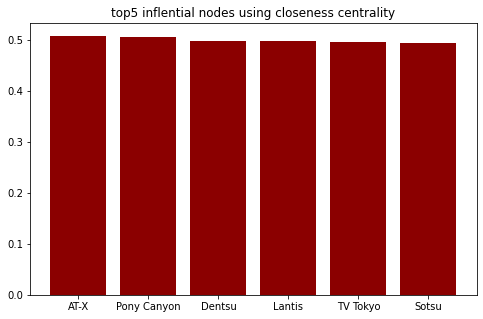

In [23]:
#Sort for identifying top10 inflential nodes using closeness_centrality
print("--------------------------------------------------")
closeness_centrality = nx.closeness_centrality(G)
rank = 0
node_name = []
value = []
print("top5 inflential nodes using closeness centrality:")
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
    print(node, closeness_centrality[node])
    node_name.append(node)
    value.append(closeness_centrality[node])
    rank+=1
    if rank > 5:
        break
plt.figure(figsize=(8,5))
plt.title("top5 inflential nodes using closeness centrality")
plt.bar(node_name, value,color="darkred")
plt.show()

--------------------------------------------------
top5 inflential nodes using betweenness centrality:
bilibili 0.08041861420248658
TV Tokyo 0.056334477585893855
DAX Production 0.04592523502156913
Pony Canyon 0.04319909405270513
AT-X 0.040935974430229734
Lantis 0.038851980128436436


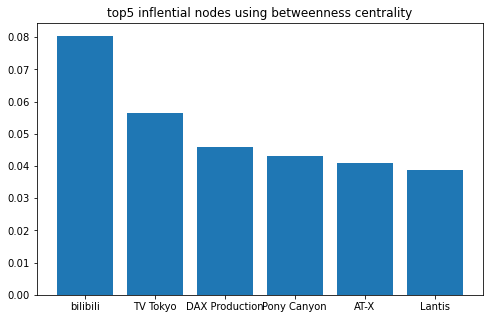

In [17]:

print("--------------------------------------------------")
betweenness_centrality = nx.betweenness_centrality(G)
rank = 0
node_name = []
value = []
print("top5 inflential nodes using betweenness centrality:")
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
    print(node, betweenness_centrality[node])
    node_name.append(node)
    value.append(betweenness_centrality[node])
    rank+=1
    if rank > 5:
        break
plt.figure(figsize=(8,5))
plt.title("top5 inflential nodes using betweenness centrality")
plt.bar(node_name, value)
plt.show()

(array([1.148e+03, 3.900e+01, 1.600e+01, 6.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.9370e+02, 3.8640e+02, 5.7910e+02, 7.7180e+02,
        9.6450e+02, 1.1572e+03, 1.3499e+03, 1.5426e+03, 1.7353e+03,
        1.9280e+03]),
 <BarContainer object of 10 artists>)

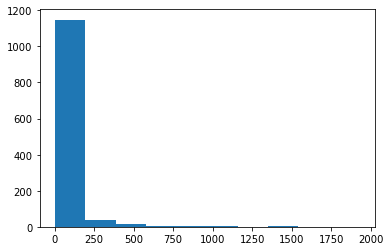

In [29]:
#Degree plot for undirected and unweighted graph
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

### treated as weighted properties

In [37]:
print("--------------------------------------------------")
clustering_coefficients = nx.clustering(G, weight='weight')
rank = 0
print("top5 highest clustering nodes:")
for node in sorted(clustering_coefficients, key=clustering_coefficients.get, reverse=True):
    print(node, clustering_coefficients[node])
    rank+=1
    if rank > 5:
        break

print("--------------------------------------------------")
# nx.average_degree_connectivity(G, weight='weight') 
# Returns:
# d:dict
# A dictionary keyed by degree k with the value of average connectivity.
degree_connectivity = nx.average_degree_connectivity(G, weight='weight')

rank = 0
print("top5 degree connectivity nodes:")
for degree in sorted(degree_connectivity, key=degree_connectivity.get, reverse=True):
    print(degree, degree_connectivity[degree])
    rank+=1
    if rank > 5:
        break


--------------------------------------------------
top5 highest clustering nodes:
Innocent Grey 0.06735883945209016
Wanda Media 0.048034371411881965
Image House 0.04243340986108882
Fujiko F. Fujio Pro 0.04238921386679804
Bee Media 0.04227740326940721
Kobunsha 0.039112106957956985
--------------------------------------------------
top5 degree connectivity nodes:
54 163.2874251497006
115 163.04458598726114
116 157.75175644028104
82 154.29857819905214
102 153.02522255192878
155 152.10640495867767
